In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = r"C:\Users\Shivani\OneDrive\Documents\B.Tech\IMU-Gait-Fall-Detection\imu-gait-fall-detection\data\processed\WISDM_combined.csv"
df = pd.read_csv(csv_path)

In [3]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['ACTIVITY'], axis=1)
y = df['ACTIVITY']

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_names = X.columns

# Sort by importance
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(20)

RESULTANT    0.028595
XPEAK        0.026021
YABSOLDEV    0.025964
YAVG         0.024954
YPEAK        0.022887
XAVG         0.021932
ZPEAK        0.020931
XABSOLDEV    0.020233
ZAVG         0.019493
XYCOS        0.018929
YZCOS        0.018904
YVAR         0.018498
YSTANDDEV    0.018202
ZABSOLDEV    0.017883
YZCOR        0.017673
XZCOS        0.017470
XSTANDDEV    0.017368
class        0.017053
XZCOR        0.016629
XVAR         0.016607
dtype: float64

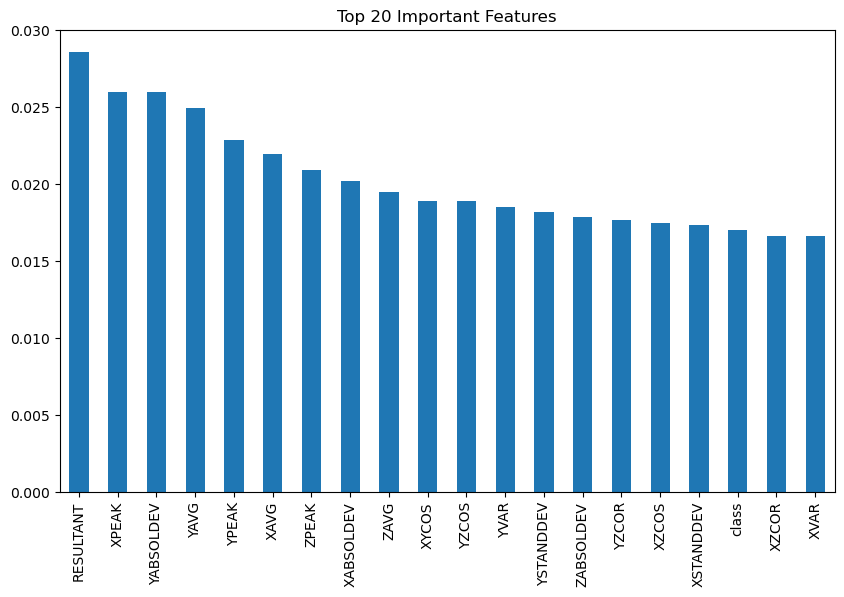

In [4]:
plt.figure(figsize=(10,6))
feat_imp.head(20).plot(kind='bar')
plt.title("Top 20 Important Features")
plt.show()

In [5]:
plt.figure(figsize=(14,10))
sns.heatmap(df.iloc[:, :30].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (first 30 features)")
plt.show()

ValueError: could not convert string to float: 'A'

<Figure size 1400x1000 with 0 Axes>

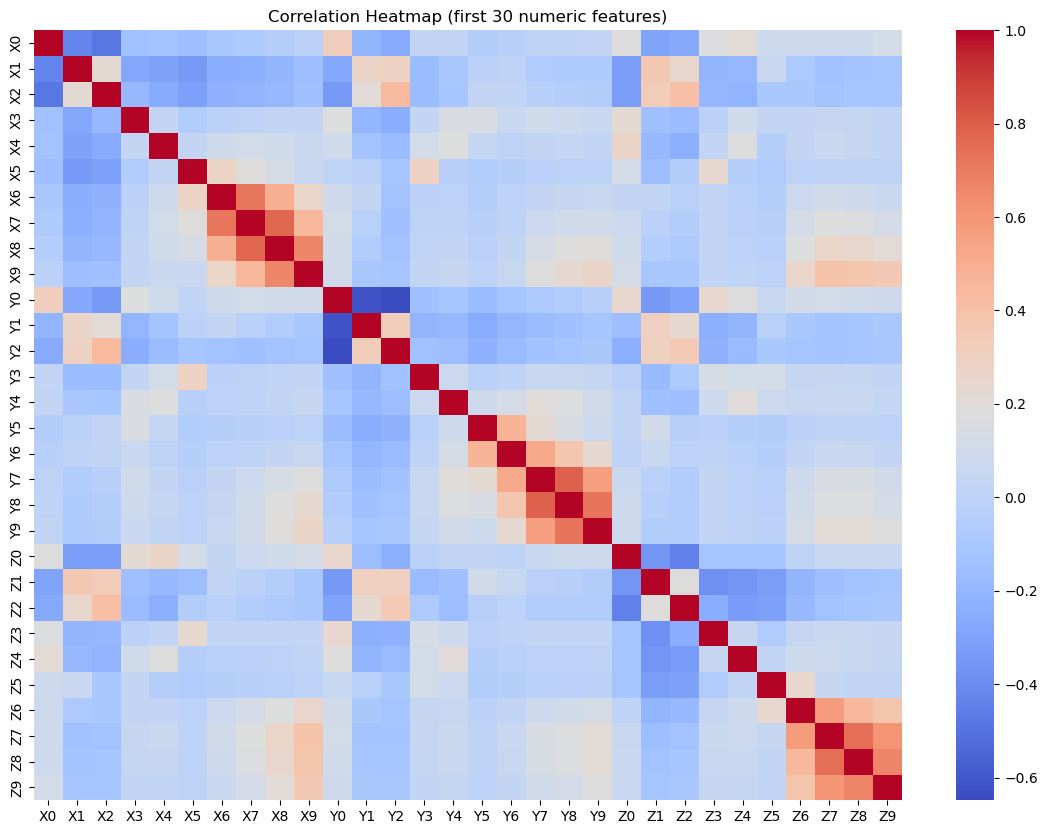

In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.iloc[:, :30].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (first 30 numeric features)")
plt.show()

In [7]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   -----------------

In [8]:
# train xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

NameError: name 'X_train' is not defined

In [9]:
df = pd.read_csv("path_to_processed_CSV_here")

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_processed_CSV_here'

In [10]:
import pandas as pd

csv_path = r"C:\Users\Shivani\OneDrive\Documents\B.Tech\IMU-Gait-Fall-Detection\imu-gait-fall-detection\data\processed\WISDM_combined.csv"

df = pd.read_csv(csv_path)

df.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,A,0.235,0.470,0.275,0.020,0.000,0.0,0.0,0.0,0.0,...,0.486106,0.479859,-0.550668,0.049864,0.121354,-0.251024,0.164468,-0.110722,10.05180,1600
1,A,0.275,0.440,0.270,0.015,0.000,0.0,0.0,0.0,0.0,...,0.479571,0.473409,-0.633171,0.072129,0.161492,-0.386416,0.215680,-0.034375,10.11710,1600
2,A,0.320,0.430,0.245,0.000,0.005,0.0,0.0,0.0,0.0,...,0.483005,0.476798,-0.659493,0.087043,0.162157,-0.325151,0.272380,-0.077274,9.98384,1600
3,A,0.315,0.495,0.185,0.005,0.000,0.0,0.0,0.0,0.0,...,0.480711,0.474534,-0.712081,0.003810,0.210015,-0.364285,0.203131,0.015328,10.10600,1600
4,A,0.215,0.455,0.325,0.005,0.000,0.0,0.0,0.0,0.0,...,0.468836,0.462811,-0.534933,0.047553,0.275833,-0.216423,0.238500,-0.009870,10.05210,1600


In [11]:
X = df.drop(['ACTIVITY'], axis=1)
y = df['ACTIVITY']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17], got ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'O' 'P' 'Q' 'R' 'S']

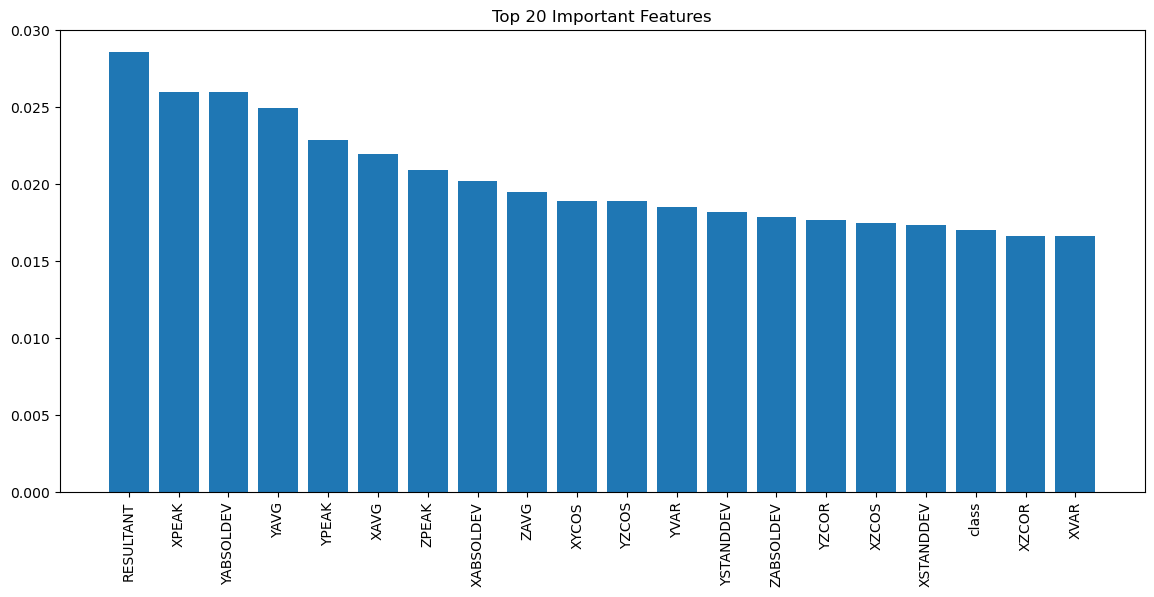

In [14]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14,6))
plt.title("Top 20 Important Features")
plt.bar(range(20), importances[indices][:20], align='center')
plt.xticks(range(20), X.columns[indices][:20], rotation=90)
plt.show()

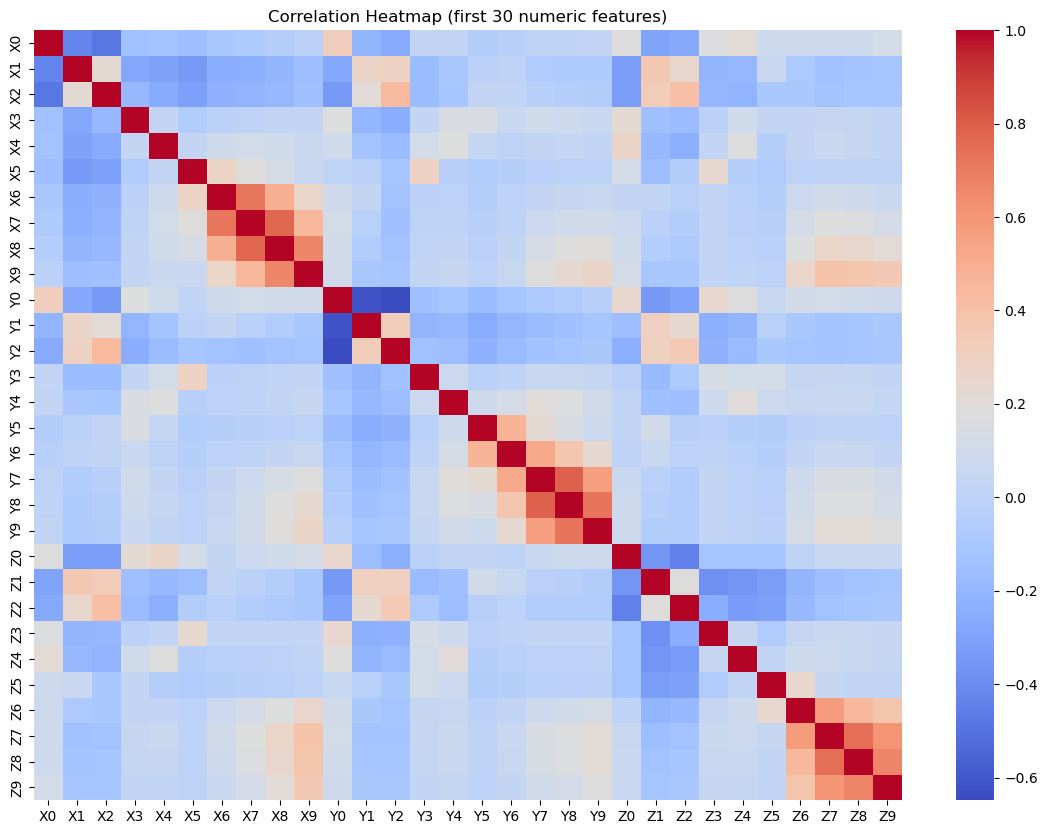

In [15]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.iloc[:, :30].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (first 30 numeric features)")
plt.show()

In [16]:
df = pd.read_csv(r"C:\Users\Shivani\OneDrive\Documents\B.Tech\IMU-Gait-Fall-Detection\imu-gait-fall-detection\data\processed\WISDM_combined.csv")

In [17]:
X = df.drop(['ACTIVITY'], axis=1)
y = df['ACTIVITY']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
!pip install xgboost

In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(df['ACTIVITY'].unique()),
    random_state=42
)

xgb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17], got ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'O' 'P' 'Q' 'R' 'S']

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ACTIVITY_ENC'] = le.fit_transform(df['ACTIVITY'])

In [21]:
X = df.drop(['ACTIVITY', 'ACTIVITY_ENC'], axis=1)
y = df['ACTIVITY_ENC']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(le.classes_),
    random_state=42
)

xgb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

XGBoost Accuracy: 0.7906125166444741


In [24]:
rf_acc = accuracy_score(y_test, model.predict(X_test))
print("Random Forest:", rf_acc)
print("XGBoost:", accuracy_score(y_test, y_pred_xgb))

Random Forest: 0.0


NameError: name 'y_pred_xgb' is not defined

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_encoded = le.fit_transform(y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(le.classes_),
    random_state=42
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=18, ...)

In [31]:
y_pred_xgb = xgb.predict(X_test)

In [32]:
rf_acc = accuracy_score(y_test, model.predict(X_test))
xgb_acc = accuracy_score(y_test, y_pred_xgb)

print("Random Forest Accuracy:", rf_acc)
print("XGBoost Accuracy:", xgb_acc)

Random Forest Accuracy: 0.0
XGBoost Accuracy: 0.7906125166444741


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(df['ACTIVITY'].unique()),
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

rf_acc = accuracy_score(y_test, y_pred_rf)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

print("Random Forest Accuracy:", rf_acc)
print("XGBoost Accuracy:", xgb_acc)

Random Forest Accuracy: 0.7612516644474034
XGBoost Accuracy: 0.7906125166444741
